Импортируем всё что требуется.

Загружаем файл `IBM.csv`

In [194]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib as ptl

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving IBM.csv to IBM.csv
User uploaded file «IBM.csv» with length 30065 bytes


Читаем файл и создаём дата-фрейм `ibm_data_frame`




In [145]:
ibm_data_frame = pd.read_csv('IBM.csv', sep=';',header=0, names=['DATE',	'OPEN',	'HIGH',	'LOW',	'CLOSE',	'VOL'])
ibm_data_frame

,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,02.01.12,186.88,188.64,182.320,182.52,1002795
1,09.01.12,181.87,183.52,177.350,179.19,1528096
2,16.01.12,180.34,188.96,179.410,188.53,1633959
3,23.01.12,187.81,192.78,187.740,190.53,1286450
4,30.01.12,188.74,194.81,188.290,193.56,1224958
...,...,...,...,...,...,...
454,21.09.20,120.45,121.55,116.495,118.91,762538
455,28.09.20,120.54,123.22,118.850,120.53,530172
456,05.10.20,121.78,135.49,121.060,127.77,1186117
457,12.10.20,128.07,128.16,124.000,125.90,700642


# 1.Узнать в какие месяцы объём сделок был больше, чем в остальные

Разделяем дата-фрейм по месяцам, выбирая по 4 строки, поскольку отчёты записаны по неделям

In [146]:
monthly_list = np.array_split(ibm_data_frame,114)
monthly_list

[       DATE    OPEN    HIGH     LOW   CLOSE      VOL
 0  02.01.12  186.88  188.64  182.32  182.52  1002795
 1  09.01.12  181.87  183.52  177.35  179.19  1528096
 2  16.01.12  180.34  188.96  179.41  188.53  1633959
 3  23.01.12  187.81  192.78  187.74  190.53  1286450
 4  30.01.12  188.74  194.81  188.29  193.56  1224958,
        DATE    OPEN     HIGH     LOW   CLOSE      VOL
 5  06.02.12  192.31  194.440  191.30  192.33  1133406
 6  13.02.12  193.30  193.855  190.84  193.42   955534
 7  20.02.12  193.70  199.200  192.49  197.71  1161729
 8  27.02.12  196.63  199.120  196.11  198.76  1347362
 9  05.03.12  198.36  201.190  196.84  200.69  1383451,
         DATE    OPEN    HIGH     LOW   CLOSE      VOL
 10  12.03.12  200.93  207.51  200.24  206.17  1135811
 11  19.03.12  205.62  206.50  203.72  205.69  1196357
 12  26.03.12  206.47  209.11  206.09  208.80   907908
 13  02.04.12  208.97  210.65  204.47  205.33  1108344
 14  09.04.12  203.86  206.15  202.20  202.86  1228660,
         DATE

Записываем ежемесячные объёмы сделок в отдельный лист `monthly_sum_vol_dict` 


Затем формируем новый дата-фрейм `monthly_sum_series` 


In [171]:
monthly_sum_vol_dict = dict()

for iter in range(len(monthly_list)):
  monthly_sum_vol_dict[iter] = [monthly_list[iter].iloc[2,0][3:], monthly_list[iter]['VOL'].sum()]

monthly_sum_frame = pd.DataFrame.from_dict(monthly_sum_vol_dict,orient='index',columns=['DATA','VOL'])
monthly_sum_frame

,DATA,VOL
0,01.12,6676258
1,02.12,5981482
2,03.12,5577080
3,04.12,4513565
4,05.12,4560125
...,...,...
109,06.20,4818449
110,07.20,4618014
111,08.20,2833058
112,09.20,3769720


Делаем вывод в столбчатую диаграмму.

Чтобы что-то можно было разглядеть выводим с шагом примерно в год

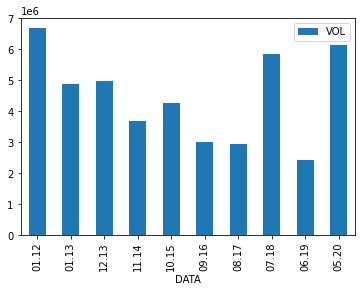

In [183]:
monthly_sum_frame[::12].plot(x='DATA', y='VOL',kind='bar')

# 2.Узнать среднюю цену акций на закрытии торгов по годам.

Раздели наш дата-фрейм примерно по годам. Их затрагивается 8


In [186]:
annual_list = np.array_split(ibm_data_frame,8)
annual_list

[        DATE    OPEN     HIGH      LOW   CLOSE      VOL
 0   02.01.12  186.88  188.640  182.320  182.52  1002795
 1   09.01.12  181.87  183.520  177.350  179.19  1528096
 2   16.01.12  180.34  188.960  179.410  188.53  1633959
 3   23.01.12  187.81  192.780  187.740  190.53  1286450
 4   30.01.12  188.74  194.810  188.290  193.56  1224958
 5   06.02.12  192.31  194.440  191.300  192.33  1133406
 6   13.02.12  193.30  193.855  190.840  193.42   955534
 7   20.02.12  193.70  199.200  192.490  197.71  1161729
 8   27.02.12  196.63  199.120  196.110  198.76  1347362
 9   05.03.12  198.36  201.190  196.840  200.69  1383451
 10  12.03.12  200.93  207.510  200.240  206.17  1135811
 11  19.03.12  205.62  206.500  203.720  205.69  1196357
 12  26.03.12  206.47  209.110  206.090  208.80   907908
 13  02.04.12  208.97  210.650  204.470  205.33  1108344
 14  09.04.12  203.86  206.150  202.200  202.86  1228660
 15  16.04.12  204.56  207.630  197.540  199.55  1897301
 16  23.04.12  198.34  208.120 

Повторяем действия из 1 пункта с новым разделением по годам

In [191]:
annual_avg_close_dict = dict()

for iter in range(len(annual_list)):
  annual_avg_close_dict[iter] = ['20'+annual_list[iter].iloc[2,0][6:], annual_list[iter]['CLOSE'].mean()]

annual_avg_frame = pd.DataFrame.from_dict(annual_avg_close_dict,orient='index',columns=['DATA','CLOSE'])
annual_avg_frame

,DATA,CLOSE
0,2012,196.883103
1,2013,191.327241
2,2014,175.343534
3,2015,147.913860
4,2016,161.781404
5,2017,149.496404
6,2018,135.255000
7,2019,127.768158


Сторим новую столбчатую диаграмму

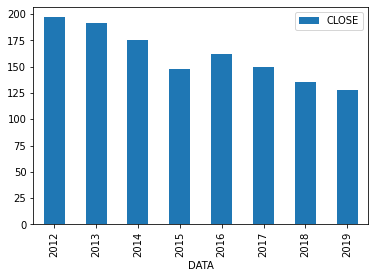

In [193]:
annual_avg_frame.plot(x='DATA', y='CLOSE',kind='bar')